In [1]:
import os
import subprocess
import pandas as pd

In [2]:
data_path = './data/'
data_list = [data_path + s for s in os.listdir(data_path)]
data_list

['./data/data004',
 './data/data005',
 './data/data003',
 './data/data002',
 './data/data001']

In [7]:
raw_data = {'Cache_Size': [], 'LRU': [], 'TWO_Q 10': [], 'TWO_Q 20': [], 'TWO_Q 30': [], 'TWO_Q 40': [], 'TWO_Q 50': []}

cache_ratio = 10
data = data_list[3]

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['Cache_Size'].append(cache_size)
    raw_data['LRU'].append(float(ratio[3]))
    raw_data['TWO_Q 10'].append(float(ratio[4]))

cache_ratio = 20

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 20'].append(float(ratio[4]))

cache_ratio = 30

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 30'].append(float(ratio[4]))

cache_ratio = 40

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 40'].append(float(ratio[4]))

cache_ratio = 50

for cache_size in range(100, 2001, 100):
    cmd = subprocess.Popen('src/main ' + data + ' ' + "{}".format(cache_size) + ' ' + "{}".format(cache_ratio),
                           shell=True, stdout=subprocess.PIPE)

    temp = ""
    for line in cmd.stdout:
        temp += line.decode("utf-8")

    ratio = temp.split('\n')

    raw_data['TWO_Q 50'].append(float(ratio[4]))

In [5]:
# ratio 20
df_hitRatio = pd.DataFrame.from_dict(raw_data)
df_hitRatio = df_hitRatio.set_index('Cache_Size')
df_hitRatio

,LRU,TWO_Q 10,TWO_Q 20,TWO_Q 30,TWO_Q 40,TWO_Q 50
Cache_Size,,,,,,
100,36.9,27.0,31.0,34.6,36.6,37.1
200,48.3,44.8,48.9,49.2,49.0,48.5
300,57.2,57.1,58.1,58.1,57.6,56.8
400,64.2,64.9,65.4,65.0,64.2,62.8
500,69.9,71.0,71.1,70.5,69.1,67.3
600,74.4,75.9,75.7,74.6,72.9,70.7
700,78.0,79.8,79.3,77.9,75.9,73.6
800,81.0,82.8,82.1,80.5,78.5,76.1
900,83.5,85.2,84.3,82.8,80.7,78.2


<AxesSubplot:xlabel='Cache_Size'>

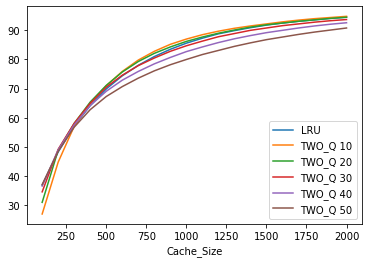

In [8]:
#data4
df_hitRatio.plot()